In [1]:
import pandas as pd
import os
from tqdm import tqdm_notebook
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["font.family"] = "serif"

In [2]:
df_trtpbs = pd.read_csv('/content/drive/My Drive/Final_Datasets/tr-tpbs.csv')
df_tr = pd.read_csv('/content/drive/My Drive/Final_Datasets/additional-datasets/thairath-222.csv')
df_tpbs = pd.read_csv('/content/drive/My Drive/Final_Datasets/additional-datasets/thaiPBS-111k.csv')
df_th2en = pd.read_csv('/content/drive/My Drive/Final_Datasets/TH-CLS-Corpus/trainset_th2en.csv')

# The Size Comparision of Datasets

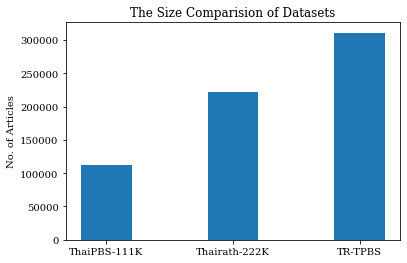

In [3]:
objects = ('ThaiPBS-111K','Thairath-222K', 'TR-TPBS')
y_pos = np.arange(len(objects))
datasets_size = [len(df_tpbs), len(df_tr), len(df_trtpbs)]

plt.bar(y_pos, datasets_size, align='center', alpha=1, width=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('No. of Articles')
plt.title('The Size Comparision of Datasets')
plt.show()

#Elements (Columns) Contained in each Dataset

In [4]:
print('TR-TPBS')
print('Number of Aritcles: ', len(df_trtpbs))
df_trtpbs.head(1)

TR-TPBS
Number of Aritcles:  310926


,body,labels,summary,tags,title,url
0,วันนี้ (23 ม.ค. 2559) นายธวัชชัย จิตรภาษ์นันท์...,เศรษฐกิจ,กสทช. เตรียมขอการสนับสนุนงบประมาณจากกองทุน กทป...,"ระบบจัดเรตติ้งโทรทัศน์ไทยใหม่,กสทช.,กองทุน กทป...",กสทช.เตรียมของบ กทปส. ปฏิรูปวิจัยเรตติ้งทีวีแบ...,https://news.thaipbs.or.th/content/7496


In [5]:
print('Thairath-222K')
print('Number of Aritcles: ', len(df_tr))
df_tpbs.head(1) 

Thairath-222K
Number of Aritcles:  222553


,title,body,summary,tags,label,url,article_length,summary_length,title_length,abstractedness_n1,abstractedness_n2,abstractedness_n3,abstractedness_n4,abstractedness_n5
0,นักวิจัยออสเตรเลียเผยสาเหตุฉลามโจมตีมนุษย์,นายนาธาน ฮาร์ท หัวหน้าทีมวิจัยจากมหาวิทยาลัยเว...,ทีมนักวิจัยออสเตรเลียศึกษาว่าเหตุใดฉลามถึงจู่...,"ฉลาม,นักวิจัย,มนุษย์,ออสเตรเลีย,แมวน้ำ,โจมตี",ต่างประเทศ,https://news.thaipbs.or.th/content/1,148.0,23.0,7.0,4.761905,50.0,66.666667,75.0,84.210526


In [6]:
print('ThaiPBS-111K')
print('Number of Aritcles: ', len(df_tpbs))
df_tr.head(1)

ThaiPBS-111K
Number of Aritcles:  111614


,title,body,summary,type,tags,url,date,title_length,article_length,summary_length,abs_n1,abs_n2,abs_n3,abs_n4,abs_n5
0,"โป้งเดียวร่วง ""ฝนพันล้าน"" ต่อยแจ๊คแพ้น็อก 4 มว...",วันที่ 30 พ.ย. 62 ศึกมวยไทยเกียรติเพชร ซูเปอร...,ฝนพันล้าน พี.เค.แสนชัยมวยไทยยิม หมัดหนักเอาเรื...,"กีฬา,มวย/MMA","มวยลุมพินี,มวยไทย,ฝนพันล้าน พี.เค.แสนชัยมวยไทย...",https://www.thairath.co.th/sport/boxing-mma/17...,2019-12-01T00:30:00+07:00,16.0,248.0,43.0,20.0,33.333333,41.463415,50.0,58.974359


In [7]:
print('Thai Crosslingual Summarization: Thai to English (TH2EN)')
print('Number of Aritcles: ', len(df_th2en))
print("Column \'en2th\' is the back-translation of \'en_summary\'")
df_th2en.tail(1)

Thai Crosslingual Summarization: Thai to English (TH2EN)
Number of Aritcles:  219336
Column 'en2th' is the back-translation of 'en_summary'


,th_body,th_sum,en_body,en_summary,en2th,url
219335,โนวัค ยอโควิช นักเทนนิสมือ 1 ของโลก จากเซอร์เบ...,โนวัค ยอโควิช กลายเป็นนักเทนนิสคนที่ 16 ของปร...,"Novak Yeokowich, the world's No.1 tennis playe...",Novak Djokovic became the 16th tennis player i...,โนวัค ดโจโควิค กลายเป็นนักเทนนิสคนที่ 16 ในประ...,https://news.thaipbs.or.th/content/39635
